# API Assignment

After learning API, I find a better way to collect data I need for my project, which is to study whether an event has an impact on company's stock price. I used to mannually download company's stock price from database, now I try to use API to get company's daily stock price from yahoo finance database. On September 10, 2019, Apple announced the release of new iPhone 11 and ipad. I'm wondering whether this launch has an positive impact on Apple's stock value. So I need to use API to get Apple's daily stock price, calculate daily return, use regression to get expected return, and get daily abnormal return by calculating the difference between expected return and actual return. Abnormal return  is the fraction of a stock's return not explained by the rate of return of the market, which is often triggered by events.

In [ ]:
!pip install pandas-datareader

In [24]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as pdr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [26]:
regressor=LinearRegression()
# Get Apple's daily stock price from 2018-7-1 to 2019-9-30
stock_AAPL = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2018, 7, 1), 
                          end=datetime.datetime(2019, 9, 30))

# Get Apple's daily return
daily_returns = stock_AAPL['Adj Close'].pct_change()
daily_returns.columns=['Actual Return']

# Get S&P 500 daily return (measures stock performance of 500 large companies as representations of U.S. stock market)
gspc=pdr.get_data_yahoo('^gspc',start=datetime.datetime(2018,7,1),end=datetime.datetime(2019,9,30))
market=gspc['Adj Close'].pct_change()

# Use regression to get Apple's expected daily return
regressor.fit(np.array(market['2018-07-05':'2019-09-02']).reshape(-1,1), 
              list(daily_returns['2018-07-05':'2019-09-02']))

# Calculate Abnormal Return (difference between actual return and expected return)
Abnormal_return=daily_returns['2018-07-05':'2019-09-24']-regressor.predict(
    np.array(market['2018-07-05':'2019-09-24']).reshape(-1,1))

In [28]:
# Abnormal return 10 days before and after the event (2019-09-10)
Abnormal_return['2019-08-26':'2019-09-24']

Date
2019-08-26    0.002254
2019-08-27   -0.006690
2019-08-28   -0.003359
2019-08-29   -0.002377
2019-08-30   -0.002483
2019-09-03   -0.004410
2019-09-04    0.000434
2019-09-05   -0.000242
2019-09-06   -0.001688
2019-09-09    0.004184
2019-09-10    0.011104
2019-09-11    0.020696
2019-09-12   -0.006791
2019-09-13   -0.018588
2019-09-16    0.009750
2019-09-17   -0.000470
2019-09-18    0.008640
2019-09-19   -0.008379
2019-09-20   -0.007478
2019-09-23    0.004469
2019-09-24    0.007681
Name: Adj Close, dtype: float64

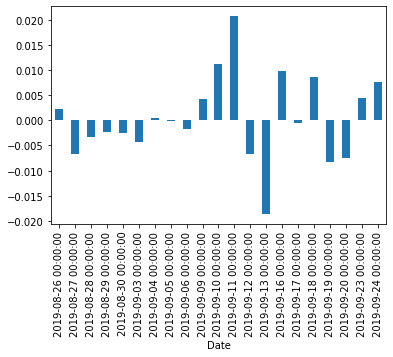

In [29]:
Abnormal_return['2019-08-26':'2019-09-24'].plot(x=Abnormal_return.index,kind='bar')

From the plot we can see that on September 10, 2019, the abnormal return is a significant positive number, which means the actual return is much higher than the expected normal return because of the event. Therefore the new product launch did have a positive impact on Apple's stock price. The stock price continued increasing on the second day but experienced a reverse on the following two days.